# Data Transformations and Cleaning

#### Grouping and Aggregation

One of the most fundamental tasks during data analysis involves splitting data into
independent groups before performing a calculation on each group

All basic groupby operations have grouping columns, and each unique combination of values in thesecolumns represents an independent grouping of the data

Syntax

df.groupby(['list', 'of', 'grouping', 'columns'])

df.groupby('single_column') # when grouping by a single column

The most common use of the .groupby method is to perform an aggregation.Most aggregations have
two other components, the aggregating columns and aggregating functions.

Aggregation functions include sum, min, max, mean, count,
variance, std, and so on

### Defining an aggregation

In [1]:
import pandas as pd
import numpy as np
flights = pd.read_csv('flights.csv')
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [2]:
#Find mean arrival delay by Airline

a=flights.groupby('AIRLINE')['ARR_DELAY'].agg('mean')

In [4]:
a.sort_values()

AIRLINE
AS    -0.833333
DL     0.339691
US     1.681105
HA     4.972973
VX     5.348884
AA     5.542661
WN     6.397353
MQ     6.860591
EV     7.034580
OO     7.593463
UA     7.765755
B6     8.692593
F9    13.630651
NK    18.436070
Name: ARR_DELAY, dtype: float64

### Grouping and aggregating with multiple columns and functions

Grouping operation, Pass on the three components: the grouping columns,
aggregating columns, and aggregating functions

### Task

Task1  : Find the number of cancelled flights for every airline per weekday

Task2: Find the number and percentage of cancelled and diverted flights for every airline
per weekday

Task3:For each origin and destination, finding the total number of flights, the number
and percentage of canceled flights, and the average and variance of the airtime

In [5]:
(flights.groupby(['AIRLINE', 'WEEKDAY'])['CANCELLED'].agg('sum'))

AIRLINE  WEEKDAY
AA       1          41
         2           9
         3          16
         4          20
         5          18
                    ..
WN       3          18
         4          10
         5           7
         6          10
         7           7
Name: CANCELLED, Length: 98, dtype: int64

In [6]:
(flights
 .groupby(['AIRLINE', 'WEEKDAY'])[['CANCELLED', 'DIVERTED']]
 .agg(['sum', 'mean'])
 )

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786
...                   ...       ...      ...       ...
WN      3              18  0.014118        2  0.001569
        4              10  0.007911        4  0.003165
        5               7  0.005828        0  0.000000
        6              10  0.010132        3  0.003040
        7               7  0.006066        3  0.002600

[98 rows x 4 columns]

In [7]:
#Use a dictionary in the .agg method to map specific aggregating 
#columns to specific aggregating functions
(flights
.groupby(['ORG_AIR', 'DEST_AIR'])
 .agg({'CANCELLED':['sum', 'mean', 'size'], 'AIR_TIME':['mean', 'var']}))

CANCELLED                   AIR_TIME            
                       sum      mean size        mean         var
ORG_AIR DEST_AIR                                                 
ATL     ABE              0  0.000000   31   96.387097   45.778495
        ABQ              0  0.000000   16  170.500000   87.866667
        ABY              0  0.000000   19   28.578947    6.590643
        ACY              0  0.000000    6   91.333333   11.466667
        AEX              0  0.000000   40   78.725000   47.332692
...                    ...       ...  ...         ...         ...
SFO     SNA              4  0.032787  122   64.059322   11.338331
        STL              0  0.000000   20  198.900000  101.042105
        SUN              0  0.000000   10   78.000000   25.777778
        TUS              0  0.000000   20  100.200000   35.221053
        XNA              0  0.000000    2  173.500000    0.500000

[1130 rows x 5 columns]

In [ ]:
#Removing the MultiIndex after grouping

In [8]:
flights = pd.read_csv('flights.csv')

In [10]:
airline_info = (flights
                .groupby(['AIRLINE', 'WEEKDAY'])
                .agg({'DIST':['sum', 'mean'],'ARR_DELAY':['min', 'max']})
                .astype(int))

In [11]:
airline_info

DIST       ARR_DELAY     
                     sum  mean       min  max
AIRLINE WEEKDAY                              
AA      1        1455386  1139       -60  551
        2        1358256  1107       -52  725
        3        1496665  1117       -45  473
        4        1452394  1089       -46  349
        5        1427749  1122       -41  732
...                  ...   ...       ...  ...
WN      3         997213   782       -38  262
        4        1024854   810       -52  284
        5         981036   816       -44  244
        6         823946   834       -41  290
        7         945679   819       -45  261

[98 rows x 4 columns]

In [12]:
airline_info.columns.get_level_values(0)

Index(['DIST', 'DIST', 'ARR_DELAY', 'ARR_DELAY'], dtype='object')

In [13]:
airline_info.columns.get_level_values(1)

Index(['sum', 'mean', 'min', 'max'], dtype='object')

In [14]:
airline_info.columns.to_flat_index()

Index([('DIST', 'sum'), ('DIST', 'mean'), ('ARR_DELAY', 'min'),
       ('ARR_DELAY', 'max')],
      dtype='object')

In [15]:
airline_info.columns = ['_'.join(x) for x in airline_info.columns.to_flat_index()]

In [16]:
airline_info

DIST_sum  DIST_mean  ARR_DELAY_min  ARR_DELAY_max
AIRLINE WEEKDAY                                                   
AA      1         1455386       1139            -60            551
        2         1358256       1107            -52            725
        3         1496665       1117            -45            473
        4         1452394       1089            -46            349
        5         1427749       1122            -41            732
...                   ...        ...            ...            ...
WN      3          997213        782            -38            262
        4         1024854        810            -52            284
        5          981036        816            -44            244
        6          823946        834            -41            290
        7          945679        819            -45            261

[98 rows x 4 columns]

In [17]:
airline_info.reset_index()

,AIRLINE,WEEKDAY,DIST_sum,DIST_mean,ARR_DELAY_min,ARR_DELAY_max
0,AA,1,1455386,1139,-60,551
1,AA,2,1358256,1107,-52,725
2,AA,3,1496665,1117,-45,473
3,AA,4,1452394,1089,-46,349
4,AA,5,1427749,1122,-41,732
...,...,...,...,...,...,...
93,WN,3,997213,782,-38,262
94,WN,4,1024854,810,-52,284
95,WN,5,981036,816,-44,244
96,WN,6,823946,834,-41,290


In [18]:
#Examining the groupby object
grouped = flights.groupby(['AIRLINE', 'WEEKDAY'])

In [19]:
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [20]:
dir(grouped)

['AIRLINE',
 'AIR_TIME',
 'ARR_DELAY',
 'CANCELLED',
 'DAY',
 'DEP_DELAY',
 'DEST_AIR',
 'DIST',
 'DIVERTED',
 'MONTH',
 'ORG_AIR',
 'SCHED_ARR',
 'SCHED_DEP',
 'WEEKDAY',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_add_numeric_operations',
 '_agg_examples_doc',
 '_agg_see_also_doc',
 '_aggregate',
 '_aggregate_frame',
 '_aggregate_item_by_item',
 '_aggregate_multiple_funcs',
 '_apply_filter',
 '_apply_to_column_groupbys',
 '_apply_whitelist',
 '_assure_grouper',
 '_bool_agg',
 '_builtin_table',
 '_choose_path',
 '_concat_objects',
 '_constructor',
 '_cumcount_array',
 '_c

In [21]:
grouped.ngroups

98

In [22]:
groups = list(grouped.groups)

In [23]:
groups[:7]

[('AA', 1), ('AA', 2), ('AA', 3), ('AA', 4), ('AA', 5), ('AA', 6), ('AA', 7)]

In [24]:
grouped.get_group(('AA', 1))

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
694,1,5,1,AA,DFW,SNA,1015,24.0,151.0,1205,1130,-2.0,0,0
702,1,5,1,AA,DFW,ATL,1515,82.0,90.0,731,1820,72.0,0,0
704,1,5,1,AA,LAX,JFK,700,-9.0,286.0,2475,1525,-33.0,0,0
709,1,5,1,AA,DFW,SNA,855,19.0,158.0,1205,1015,1.0,0,0
716,1,5,1,AA,ORD,BOS,1400,13.0,101.0,867,1710,6.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57958,12,28,1,AA,MSP,ORD,559,NaN,NaN,334,745,NaN,0,1
57959,12,28,1,AA,DEN,CLT,640,0.0,168.0,1337,1201,-2.0,0,0
57980,12,28,1,AA,ATL,MIA,810,109.0,86.0,594,1016,102.0,0,0
57987,12,28,1,AA,LAS,PHX,1940,-8.0,48.0,255,2145,-7.0,0,0


In [ ]:
#to show the results of all the commands in a single cell
from IPython.display import display


In [25]:
for name, group in grouped:
    print(name)
    display(group.head(3))

('AA', 1)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
694,1,5,1,AA,DFW,SNA,1015,24.0,151.0,1205,1130,-2.0,0,0
702,1,5,1,AA,DFW,ATL,1515,82.0,90.0,731,1820,72.0,0,0
704,1,5,1,AA,LAX,JFK,700,-9.0,286.0,2475,1525,-33.0,0,0


('AA', 2)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
848,1,6,2,AA,DFW,MFE,1640,-2.0,71.0,469,1812,-1.0,0,0
863,1,6,2,AA,ORD,BOS,1015,60.0,97.0,867,1324,51.0,0,0
864,1,6,2,AA,DEN,ORD,1210,42.0,103.0,888,1533,23.0,0,0


('AA', 3)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
1039,1,7,3,AA,LAX,DFW,1305,3.0,165.0,1235,1808,14.0,0,0
1045,1,7,3,AA,DFW,SFO,2040,7.0,186.0,1464,2234,-22.0,0,0
1046,1,7,3,AA,ORD,DCA,1135,-8.0,80.0,612,1419,-4.0,0,0


('AA', 4)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
6,1,1,4,AA,DFW,MSY,1250,84.0,64.0,447,1410,83.0,0,0
8,1,1,4,AA,ORD,STL,1845,-5.0,44.0,258,1950,-5.0,0,0


('AA', 5)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
146,1,2,5,AA,DFW,BNA,1305,71.0,78.0,631,1445,68.0,0,0
160,1,2,5,AA,DFW,AUS,1515,49.0,42.0,190,1610,59.0,0,0
171,1,2,5,AA,DFW,LAX,1220,17.0,162.0,1235,1340,11.0,0,0


('AA', 6)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
309,1,3,6,AA,DFW,MCO,755,-7.0,126.0,985,1125,-13.0,0,0
311,1,3,6,AA,LAS,DFW,700,160.0,132.0,1055,1145,153.0,0,0
321,1,3,6,AA,ORD,FLL,545,10.0,161.0,1182,940,15.0,0,0


('AA', 7)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
491,1,4,7,AA,DFW,CMH,1245,16.0,106.0,926,1605,-2.0,0,0
493,1,4,7,AA,DFW,DTW,1325,0.0,121.0,986,1655,6.0,0,0
497,1,4,7,AA,DFW,LIT,1620,41.0,46.0,304,1730,47.0,0,0


('AS', 1)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
718,1,5,1,AS,IAH,SEA,1740,0.0,263.0,1874,2025,8.0,0,0
737,1,5,1,AS,LAS,PDX,650,-1.0,121.0,763,906,2.0,0,0
741,1,5,1,AS,ORD,SEA,1520,32.0,265.0,1721,1805,26.0,0,0


('AS', 2)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
867,1,6,2,AS,LAS,SEA,910,1.0,121.0,867,1145,-14.0,0,0
872,1,6,2,AS,MSP,SEA,1630,-6.0,218.0,1399,1815,5.0,0,0
1005,1,6,2,AS,DEN,SEA,600,-1.0,154.0,1024,810,-5.0,0,0


('AS', 3)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
1106,1,7,3,AS,SFO,SEA,2045,-15.0,91.0,679,2245,-28.0,0,0
1146,1,7,3,AS,SFO,SEA,1935,-5.0,95.0,679,2135,-7.0,0,0
2151,1,14,3,AS,DEN,SEA,800,-13.0,148.0,1024,1005,-17.0,0,0


('AS', 4)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
38,1,1,4,AS,PHX,SEA,1505,-2.0,155.0,1107,1702,-3.0,0,0
1292,1,8,4,AS,LAX,SEA,1940,-10.0,125.0,954,2220,-21.0,0,0
2269,1,15,4,AS,LAS,PDX,650,-21.0,116.0,763,910,-21.0,0,0


('AS', 5)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
198,1,2,5,AS,LAX,SEA,2110,5.0,145.0,954,2352,8.0,0,0
241,1,2,5,AS,LAS,PDX,650,-5.0,117.0,763,906,-3.0,0,0
277,1,2,5,AS,ORD,ANC,935,-1.0,402.0,2846,1339,-6.0,0,0


('AS', 6)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
397,1,3,6,AS,LAS,SEA,1300,48.0,137.0,867,1535,47.0,0,0
450,1,3,6,AS,SFO,SEA,1010,1.0,107.0,679,1212,10.0,0,0
453,1,3,6,AS,SFO,SEA,1935,71.0,102.0,679,2137,70.0,0,0


('AS', 7)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
500,1,4,7,AS,LAS,SEA,1500,20.0,140.0,867,1745,13.0,0,0
518,1,4,7,AS,LAX,PDX,1735,-7.0,124.0,834,1957,5.0,0,0
591,1,4,7,AS,LAX,SEA,600,-1.0,154.0,954,850,5.0,0,0


('B6', 1)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
696,1,5,1,B6,LAS,BOS,1230,0.0,270.0,2381,2026,-6.0,0,0
757,1,5,1,B6,ORD,BOS,600,-5.0,111.0,867,916,-11.0,0,0
1800,1,12,1,B6,SFO,LGB,1921,15.0,58.0,354,2039,10.0,0,0


('B6', 2)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
945,1,6,2,B6,SFO,LGB,1310,1.0,65.0,354,1432,-3.0,0,0
1939,1,13,2,B6,SFO,BOS,800,-5.0,316.0,2704,1629,7.0,0,0
1998,1,13,2,B6,DFW,BOS,1110,5.0,184.0,1562,1536,7.0,0,0


('B6', 3)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
3306,1,21,3,B6,LAS,JFK,2318,-4.0,244.0,2248,659,-22.0,0,0
5483,2,4,3,B6,LAX,BOS,2349,-7.0,298.0,2611,809,-12.0,0,0
5577,2,4,3,B6,SFO,LGB,1921,-4.0,64.0,354,2039,8.0,0,0


('B6', 4)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
123,1,1,4,B6,LAS,BOS,1230,0.0,246.0,2381,2026,-27.0,0,0
127,1,1,4,B6,LAS,BOS,2359,68.0,247.0,2381,749,46.0,0,0
1175,1,8,4,B6,LAS,LGB,1501,-1.0,40.0,231,1605,-8.0,0,0


('B6', 5)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
239,1,2,5,B6,ORD,BOS,540,-8.0,96.0,867,856,-22.0,0,0
1361,1,9,5,B6,LAS,LGB,1145,-5.0,43.0,231,1252,-11.0,0,0
1453,1,9,5,B6,SFO,JFK,2125,-4.0,287.0,2586,546,-22.0,0,0


('B6', 6)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
333,1,3,6,B6,LAX,FLL,2237,32.0,270.0,2342,619,42.0,0,0
1547,1,10,6,B6,SFO,FLL,2259,-7.0,303.0,2583,716,0.0,0,0
1561,1,10,6,B6,LAX,JFK,1100,-8.0,288.0,2475,1918,-10.0,0,0


('B6', 7)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
548,1,4,7,B6,SFO,FLL,2307,-4.0,298.0,2583,724,-1.0,0,0
549,1,4,7,B6,SFO,JFK,1200,19.0,293.0,2586,2030,27.0,0,0
1650,1,11,7,B6,LAS,LGB,1501,166.0,41.0,231,1605,171.0,0,0


('DL', 1)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
668,1,5,1,DL,IAH,ATL,1406,-2.0,83.0,689,1702,-20.0,0,0
675,1,5,1,DL,MSP,DCA,1305,-3.0,104.0,931,1627,-17.0,0,0
680,1,5,1,DL,ATL,BDL,1805,-2.0,101.0,859,2022,-17.0,0,0


('DL', 2)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
849,1,6,2,DL,ATL,MCO,1305,13.0,57.0,404,1432,4.0,0,0
855,1,6,2,DL,ATL,MCI,1610,8.0,107.0,692,1726,-4.0,0,0
877,1,6,2,DL,PHX,MSP,1242,-3.0,160.0,1276,1649,-12.0,0,0


('DL', 3)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
1018,1,7,3,DL,ATL,HOU,1612,3.0,110.0,696,1734,-2.0,0,0
1019,1,7,3,DL,ORD,DTW,1340,-2.0,57.0,235,1609,-10.0,0,0
1027,1,7,3,DL,MSP,SLC,1721,3.0,145.0,991,1919,-14.0,0,0


('DL', 4)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
53,1,1,4,DL,LAS,MSP,713,-5.0,156.0,1299,1220,-18.0,0,0
57,1,1,4,DL,MSP,RSW,700,-1.0,169.0,1416,1130,-20.0,0,0
77,1,1,4,DL,LAX,ATL,1130,24.0,217.0,1947,1840,16.0,0,0


('DL', 5)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
137,1,2,5,DL,ATL,HSV,1355,0.0,38.0,151,1351,5.0,0,0
142,1,2,5,DL,DEN,ATL,1420,38.0,148.0,1199,1905,45.0,0,0
152,1,2,5,DL,ATL,MCO,655,1.0,59.0,404,822,-7.0,0,0


('DL', 6)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
307,1,3,6,DL,ATL,PHX,810,0.0,224.0,1587,1029,-16.0,0,0
308,1,3,6,DL,ATL,RDU,1125,9.0,48.0,356,1248,-5.0,0,0
310,1,3,6,DL,MSP,JAC,1120,-3.0,133.0,872,1252,-11.0,0,0


('DL', 7)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
490,1,4,7,DL,PHX,DTW,1059,1.0,197.0,1671,1647,-5.0,0,0
492,1,4,7,DL,ATL,MCO,1455,-2.0,62.0,404,1624,-10.0,0,0
508,1,4,7,DL,LAX,DTW,928,16.0,238.0,1979,1655,11.0,0,0


('EV', 1)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
677,1,5,1,EV,ATL,FSD,2010,154.0,145.0,954,2150,156.0,0,0
683,1,5,1,EV,ORD,CHS,810,74.0,93.0,760,1120,58.0,0,0
689,1,5,1,EV,IAH,BRO,907,-2.0,51.0,308,1021,-6.0,0,0


('EV', 2)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
857,1,6,2,EV,ATL,FSM,1013,2.0,85.0,579,1109,-14.0,0,0
861,1,6,2,EV,ATL,ROA,1454,-3.0,56.0,357,1618,-12.0,0,0
866,1,6,2,EV,DFW,TYS,1130,-3.0,92.0,772,1423,1.0,0,0


('EV', 3)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
1020,1,7,3,EV,DFW,CLE,1924,-10.0,140.0,1021,2255,-3.0,0,0
1021,1,7,3,EV,ORD,ATW,1436,28.0,37.0,160,1535,20.0,0,0
1022,1,7,3,EV,IAH,ELP,1735,-3.0,96.0,667,1842,5.0,0,0


('EV', 4)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
11,1,1,4,EV,ORD,JAN,1155,6.0,113.0,677,1403,5.0,0,0
13,1,1,4,EV,ORD,CMH,1010,-2.0,46.0,296,1228,-9.0,0,0
29,1,1,4,EV,ORD,IND,1025,-6.0,29.0,177,1228,-19.0,0,0


('EV', 5)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
136,1,2,5,EV,ATL,JAN,1056,1.0,59.0,341,1123,6.0,0,0
143,1,2,5,EV,ORD,RIC,1930,-8.0,88.0,642,2236,-25.0,0,0
147,1,2,5,EV,DEN,ELP,1510,64.0,87.0,563,1658,63.0,0,0


('EV', 6)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
312,1,3,6,EV,IAH,SHV,2000,18.0,31.0,192,2054,14.0,0,0
319,1,3,6,EV,ORD,LNK,1240,31.0,74.0,466,1425,23.0,0,0
337,1,3,6,EV,IAH,LEX,1257,97.0,103.0,828,1611,85.0,0,0


('EV', 7)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
495,1,4,7,EV,ORD,ERI,1310,73.0,56.0,398,1538,87.0,0,0
499,1,4,7,EV,DEN,FAR,1940,NaN,NaN,627,2233,NaN,0,1
503,1,4,7,EV,ATL,PIA,1615,22.0,85.0,565,1705,15.0,0,0


('F9', 1)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
685,1,5,1,F9,IAH,DEN,1919,-1.0,121.0,862,2050,-10.0,0,0
738,1,5,1,F9,DEN,MCO,1810,-4.0,179.0,1546,2329,8.0,0,0
844,1,5,1,F9,DFW,DEN,1858,NaN,NaN,641,2000,NaN,0,1


('F9', 2)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
870,1,6,2,F9,DEN,CLE,1043,-2.0,145.0,1201,1530,-3.0,0,0
948,1,6,2,F9,DEN,MCO,1810,-6.0,174.0,1546,2329,-13.0,0,0
985,1,6,2,F9,DEN,ORD,920,-3.0,110.0,888,1240,-6.0,0,0


('F9', 3)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
1103,1,7,3,F9,DEN,FSD,1614,-6.0,66.0,483,1835,13.0,0,0
2069,1,14,3,F9,ORD,IAD,1250,24.0,83.0,589,1540,33.0,0,0
2078,1,14,3,F9,PHX,CVG,15,-7.0,171.0,1569,540,-20.0,0,0


('F9', 4)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
7,1,1,4,F9,SFO,PHX,1020,-7.0,91.0,651,1315,-6.0,0,0
93,1,1,4,F9,ATL,DEN,859,16.0,181.0,1199,1026,10.0,0,0
1167,1,8,4,F9,LAS,IAD,2255,62.0,228.0,2065,615,59.0,0,0


('F9', 5)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
209,1,2,5,F9,MSP,DEN,1025,-6.0,97.0,680,1134,-13.0,0,0
232,1,2,5,F9,DEN,PHX,2040,-7.0,83.0,602,2228,-18.0,0,0
247,1,2,5,F9,ORD,ATL,730,10.0,86.0,606,1020,23.0,0,0


('F9', 6)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
386,1,3,6,F9,ORD,ATL,730,NaN,NaN,606,1020,NaN,0,1
444,1,3,6,F9,DEN,SEA,740,10.0,165.0,1024,933,18.0,0,0
483,1,3,6,F9,MSP,DEN,1928,39.0,98.0,680,2035,110.0,0,0


('F9', 7)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
553,1,4,7,F9,DEN,SAN,1800,54.0,109.0,853,1914,44.0,0,0
563,1,4,7,F9,MSP,TTN,1530,311.0,NaN,989,1905,NaN,0,1
596,1,4,7,F9,DEN,LAX,1320,165.0,114.0,862,1442,162.0,0,0


('HA', 1)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
712,1,5,1,HA,LAS,HNL,900,-5.0,357.0,2762,1315,5.0,0,0
1864,1,12,1,HA,LAS,HNL,145,-9.0,352.0,2762,555,-2.0,0,0
3002,1,19,1,HA,LAX,HNL,840,-8.0,328.0,2556,1225,-7.0,0,0


('HA', 2)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
878,1,6,2,HA,PHX,HNL,800,1.0,374.0,2917,1140,3.0,0,0
3165,1,20,2,HA,LAX,HNL,1000,-2.0,328.0,2556,1350,-7.0,0,0
4359,1,27,2,HA,LAX,OGG,1115,-24.0,NaN,2486,1500,NaN,1,0


('HA', 3)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
1053,1,7,3,HA,LAX,HNL,1705,0.0,332.0,2556,2055,-2.0,0,0
3227,1,21,3,HA,LAX,OGG,1115,-10.0,301.0,2486,1500,-8.0,0,0
4414,1,28,3,HA,SFO,OGG,950,-14.0,304.0,2338,1315,-6.0,0,0


('HA', 4)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
1269,1,8,4,HA,LAX,HNL,1000,-1.0,335.0,2556,1350,0.0,0,0
2316,1,15,4,HA,LAX,HNL,1705,22.0,319.0,2556,2055,10.0,0,0
11626,3,12,4,HA,SFO,HNL,940,-1.0,352.0,2398,1220,29.0,0,0


('HA', 5)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
1345,1,9,5,HA,LAS,HNL,900,27.0,354.0,2762,1315,29.0,0,0
9360,2,27,5,HA,LAS,HNL,1710,-4.0,363.0,2762,2130,-1.0,0,0
11809,3,13,5,HA,LAX,HNL,840,-6.0,367.0,2556,1140,13.0,0,0


('HA', 6)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
1544,1,10,6,HA,PHX,HNL,800,-4.0,379.0,2917,1140,-7.0,0,0
2644,1,17,6,HA,LAS,HNL,900,-14.0,376.0,2762,1315,9.0,0,0
2681,1,17,6,HA,SFO,HNL,845,-3.0,331.0,2398,1215,16.0,0,0


('HA', 7)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
582,1,4,7,HA,LAX,OGG,1115,-11.0,310.0,2486,1500,-27.0,0,0
7267,2,15,7,HA,PHX,HNL,800,-2.0,385.0,2917,1145,-9.0,0,0
7372,2,15,7,HA,LAX,HNL,840,-14.0,336.0,2556,1235,-18.0,0,0


('MQ', 1)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
707,1,5,1,MQ,ORD,CMH,850,48.0,48.0,296,1058,49.0,0,0
711,1,5,1,MQ,ORD,CID,1810,NaN,NaN,196,1913,NaN,0,1
722,1,5,1,MQ,ATL,ORD,935,31.0,93.0,606,1035,91.0,0,0


('MQ', 2)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
851,1,6,2,MQ,ORD,SYR,1325,26.0,73.0,607,1603,44.0,0,0
854,1,6,2,MQ,DFW,MAF,900,2.0,53.0,309,1013,-2.0,0,0
856,1,6,2,MQ,ORD,RST,1145,16.0,56.0,268,1253,22.0,0,0


('MQ', 3)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
1036,1,7,3,MQ,ORD,DSM,2215,63.0,53.0,299,2331,55.0,0,0
1085,1,7,3,MQ,ORD,DTW,920,41.0,52.0,235,1136,41.0,0,0
1087,1,7,3,MQ,ATL,LGA,1321,127.0,102.0,762,1530,186.0,0,0


('MQ', 4)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
10,1,1,4,MQ,DFW,DRO,1335,28.0,104.0,674,1438,28.0,0,0
18,1,1,4,MQ,ORD,DAY,2220,19.0,37.0,240,23,20.0,0,0


('MQ', 5)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
149,1,2,5,MQ,ORD,SGF,1710,23.0,83.0,438,1848,25.0,0,0
180,1,2,5,MQ,ORD,LIT,2220,54.0,84.0,552,3,59.0,0,0
187,1,2,5,MQ,ORD,GRR,1510,26.0,38.0,137,1713,10.0,0,0


('MQ', 6)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
314,1,3,6,MQ,DFW,LBB,805,47.0,47.0,282,908,53.0,0,0
320,1,3,6,MQ,DFW,CAE,1425,47.0,116.0,922,1738,51.0,0,0
334,1,3,6,MQ,ORD,XNA,810,3.0,86.0,522,953,99.0,0,0


('MQ', 7)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
502,1,4,7,MQ,ORD,EVV,1715,210.0,44.0,273,1818,213.0,0,0
516,1,4,7,MQ,ORD,DBQ,1540,NaN,NaN,147,1638,NaN,0,1
524,1,4,7,MQ,DFW,XNA,755,34.0,46.0,280,858,42.0,0,0


('NK', 1)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
729,1,5,1,NK,LAS,DTW,1220,28.0,225.0,1749,1914,42.0,0,0
735,1,5,1,NK,DFW,RSW,815,48.0,124.0,1017,1143,43.0,0,0
845,1,5,1,NK,LAS,LAX,2020,44.0,39.0,236,2131,44.0,0,0


('NK', 2)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
858,1,6,2,NK,DEN,DTW,1959,8.0,124.0,1123,38,-2.0,0,0
887,1,6,2,NK,LAS,IAH,1705,-1.0,158.0,1222,2157,9.0,0,0
898,1,6,2,NK,LAS,OAK,1145,0.0,62.0,407,1316,-12.0,0,0


('NK', 3)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
1017,1,7,3,NK,DFW,LGA,750,-5.0,181.0,1389,1200,45.0,0,0
1095,1,7,3,NK,MSP,LAX,1650,15.0,203.0,1535,1843,7.0,0,0
1097,1,7,3,NK,IAH,LAX,1524,130.0,172.0,1379,1703,111.0,0,0


('NK', 4)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
17,1,1,4,NK,DEN,DTW,1952,37.0,124.0,1123,31,54.0,0,0
74,1,1,4,NK,PHX,DFW,159,-1.0,103.0,868,502,1.0,0,0
95,1,1,4,NK,LAS,OAK,1115,22.0,62.0,407,1246,10.0,0,0


('NK', 5)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
166,1,2,5,NK,LAS,PDX,1535,-8.0,123.0,763,1754,-4.0,0,0
1342,1,9,5,NK,DEN,ORD,1340,48.0,109.0,888,1709,42.0,0,0
1392,1,9,5,NK,DFW,FLL,600,35.0,138.0,1119,939,34.0,0,0


('NK', 6)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
345,1,3,6,NK,LAX,DFW,1934,4.0,155.0,1235,22,7.0,0,0
358,1,3,6,NK,LAS,BWI,2350,44.0,239.0,2106,710,41.0,0,0
401,1,3,6,NK,DFW,PHX,2320,9.0,127.0,868,51,4.0,0,0


('NK', 7)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
507,1,4,7,NK,DFW,PHX,2320,-2.0,128.0,868,51,-8.0,0,0
510,1,4,7,NK,LAS,IAH,144,-7.0,141.0,1222,634,-8.0,0,0
519,1,4,7,NK,ORD,LAX,725,-1.0,234.0,1744,1002,-7.0,0,0


('OO', 1)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
666,1,5,1,OO,IAH,MEM,1258,-4.0,61.0,468,1430,-10.0,0,0
671,1,5,1,OO,DEN,MAF,1411,32.0,74.0,563,1653,23.0,0,0
672,1,5,1,OO,DEN,HYS,1110,10.0,48.0,298,1327,-1.0,0,0


('OO', 2)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
846,1,6,2,OO,ORD,MKE,1156,-2.0,20.0,67,1245,-9.0,0,0
880,1,6,2,OO,ORD,MKE,810,67.0,19.0,67,903,85.0,0,0
882,1,6,2,OO,MSP,ABR,2154,-7.0,49.0,257,2319,-23.0,0,0


('OO', 3)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
1032,1,7,3,OO,SFO,SBA,830,-8.0,68.0,262,955,-6.0,0,0
1034,1,7,3,OO,MSP,FSD,1559,-4.0,33.0,196,1704,-11.0,0,0
1035,1,7,3,OO,DEN,IND,1006,-1.0,114.0,977,1431,12.0,0,0


('OO', 4)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
12,1,1,4,OO,ORD,MSP,1510,2.0,65.0,334,1646,4.0,0,0
16,1,1,4,OO,DEN,SGU,1105,21.0,66.0,517,1249,20.0,0,0
22,1,1,4,OO,LAS,LAX,1544,-4.0,39.0,236,1655,-12.0,0,0


('OO', 5)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
138,1,2,5,OO,PHX,PSP,2055,0.0,45.0,261,2100,13.0,0,0
139,1,2,5,OO,LAX,DFW,945,171.0,159.0,1235,1454,171.0,0,0
151,1,2,5,OO,IAH,ASE,1835,39.0,120.0,913,2027,8.0,0,0


('OO', 6)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
315,1,3,6,OO,SFO,TUS,1420,158.0,94.0,751,1725,148.0,0,0
317,1,3,6,OO,LAX,SAN,1705,-5.0,33.0,109,1750,10.0,0,0
318,1,3,6,OO,DEN,LIT,1145,6.0,109.0,771,1450,27.0,0,0


('OO', 7)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
540,1,4,7,OO,SFO,SBP,1857,-9.0,46.0,190,2002,-7.0,0,0
552,1,4,7,OO,MSP,RAP,900,94.0,83.0,489,956,88.0,0,0
554,1,4,7,OO,DEN,ASE,1700,37.0,28.0,125,1751,29.0,0,0


('UA', 1)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
667,1,5,1,UA,DEN,SAN,1117,59.0,110.0,853,1241,46.0,0,0
686,1,5,1,UA,SFO,IAD,1659,-13.0,267.0,2419,105,-24.0,0,0
687,1,5,1,UA,IAH,LAX,1324,1.0,168.0,1379,1507,-33.0,0,0


('UA', 2)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
847,1,6,2,UA,SFO,PDX,1817,-7.0,77.0,550,2007,-16.0,0,0
850,1,6,2,UA,DEN,MSP,804,0.0,94.0,680,1103,2.0,0,0
859,1,6,2,UA,SFO,ORD,1120,-3.0,213.0,1846,1738,-6.0,0,0


('UA', 3)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
1025,1,7,3,UA,DEN,BIL,1110,53.0,71.0,455,1244,50.0,0,0
1026,1,7,3,UA,IAH,PHL,744,142.0,159.0,1325,1201,119.0,0,0
1052,1,7,3,UA,IAH,DCA,1554,-3.0,138.0,1208,1948,-3.0,0,0


('UA', 4)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
5,1,1,4,UA,IAH,SAN,1450,1.0,178.0,1303,1620,-14.0,0,0
9,1,1,4,UA,IAH,SJC,925,3.0,215.0,1608,1136,-14.0,0,0


('UA', 5)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
140,1,2,5,UA,ORD,CLT,1332,-6.0,78.0,599,1625,-23.0,0,0
141,1,2,5,UA,IAH,CLE,1907,30.0,119.0,1091,2250,4.0,0,0
144,1,2,5,UA,IAH,PHL,1028,14.0,162.0,1325,1443,-5.0,0,0


('UA', 6)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
325,1,3,6,UA,SFO,JFK,1515,0.0,295.0,2586,2341,5.0,0,0
338,1,3,6,UA,PHX,SFO,645,15.0,99.0,651,759,-7.0,0,0
340,1,3,6,UA,SFO,HNL,1610,84.0,305.0,2398,1944,80.0,0,0


('UA', 7)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
501,1,4,7,UA,DEN,SEA,2213,73.0,159.0,1024,13,73.0,0,0
511,1,4,7,UA,LAS,SFO,923,-10.0,65.0,414,1107,-15.0,0,0
512,1,4,7,UA,LAX,HNL,1921,17.0,321.0,2556,2322,6.0,0,0


('US', 1)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
690,1,5,1,US,PHX,SNA,1120,1.0,51.0,338,1145,-7.0,0,0
715,1,5,1,US,PHX,SAN,845,-7.0,46.0,304,900,-5.0,0,0
726,1,5,1,US,PHX,ATL,959,-4.0,194.0,1587,1538,7.0,0,0


('US', 2)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
881,1,6,2,US,PHX,BOS,1330,2.0,255.0,2300,2017,-4.0,0,0
896,1,6,2,US,PHX,PHL,1555,-2.0,227.0,2075,2212,5.0,0,0
901,1,6,2,US,LAX,PHL,2215,2.0,259.0,2402,608,-13.0,0,0


('US', 3)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
1028,1,7,3,US,PHX,LAS,1110,-2.0,43.0,255,1124,-6.0,0,0
1033,1,7,3,US,PHX,BOI,1037,-3.0,105.0,735,1249,-9.0,0,0
1068,1,7,3,US,IAH,PHL,1459,-3.0,164.0,1325,1908,-13.0,0,0


('US', 4)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
31,1,1,4,US,PHX,DEN,1810,29.0,94.0,602,1954,49.0,0,0
35,1,1,4,US,ORD,PHL,1600,-2.0,80.0,678,1857,-9.0,0,0
49,1,1,4,US,IAH,PHX,1445,-1.0,147.0,1009,1638,-7.0,0,0


('US', 5)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
148,1,2,5,US,PHX,DCA,1340,-1.0,216.0,1979,1947,-14.0,0,0
150,1,2,5,US,LAS,PHX,635,-4.0,44.0,255,846,-15.0,0,0
153,1,2,5,US,ATL,CLT,1959,0.0,41.0,226,2113,-11.0,0,0


('US', 6)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
355,1,3,6,US,LAS,PHX,1635,-6.0,47.0,255,1844,-7.0,0,0
360,1,3,6,US,DFW,PHX,605,-2.0,124.0,868,742,-16.0,0,0
372,1,3,6,US,PHX,DFW,1325,-2.0,112.0,868,1640,-4.0,0,0


('US', 7)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
494,1,4,7,US,PHX,SFO,2359,29.0,93.0,651,100,23.0,0,0
538,1,4,7,US,PHX,ATL,959,-2.0,192.0,1587,1538,3.0,0,0
545,1,4,7,US,MSP,PHX,1120,-9.0,176.0,1276,1351,-2.0,0,0


('VX', 1)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
703,1,5,1,VX,SFO,LAX,1835,-2.0,53.0,337,1955,-5.0,0,0
759,1,5,1,VX,SFO,LAX,1535,12.0,54.0,337,1655,2.0,0,0
812,1,5,1,VX,SFO,SAN,1955,5.0,67.0,447,2120,0.0,0,0


('VX', 2)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
943,1,6,2,VX,LAX,SFO,1635,-6.0,49.0,337,1750,-16.0,0,0
1930,1,13,2,VX,LAX,SEA,1735,-9.0,135.0,954,2015,-20.0,0,0
1957,1,13,2,VX,LAX,SFO,1825,-11.0,53.0,337,1945,-14.0,0,0


('VX', 3)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
1058,1,7,3,VX,SFO,JFK,2320,-4.0,295.0,2586,750,-7.0,0,0
1092,1,7,3,VX,LAX,JFK,2310,-2.0,281.0,2475,725,-5.0,0,0
1093,1,7,3,VX,LAX,IAD,830,-3.0,274.0,2288,1610,11.0,0,0


('VX', 4)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
56,1,1,4,VX,LAS,SFO,900,23.0,65.0,414,1035,11.0,0,0
1192,1,8,4,VX,LAX,DAL,710,-5.0,165.0,1246,1205,6.0,0,0
1302,1,8,4,VX,LAS,SFO,1125,-3.0,63.0,414,1300,-17.0,0,0


('VX', 5)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
227,1,2,5,VX,SFO,LAS,1220,-5.0,68.0,414,1350,-5.0,0,0
243,1,2,5,VX,SFO,SEA,700,-4.0,104.0,679,905,-1.0,0,0
1312,1,9,5,VX,SFO,LAX,1530,-3.0,56.0,337,1650,-5.0,0,0


('VX', 6)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
417,1,3,6,VX,SFO,LAS,900,-2.0,62.0,414,1030,-11.0,0,0
432,1,3,6,VX,SFO,SEA,2035,-2.0,106.0,679,2240,-2.0,0,0
464,1,3,6,VX,ORD,LAX,925,48.0,233.0,1744,1155,58.0,0,0


('VX', 7)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
614,1,4,7,VX,SFO,AUS,1610,-7.0,181.0,1504,2135,-16.0,0,0
641,1,4,7,VX,LAX,SFO,1715,15.0,56.0,337,1830,33.0,0,0
1599,1,11,7,VX,LAS,LAX,1050,3.0,43.0,236,1200,6.0,0,0


('WN', 1)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
669,1,5,1,WN,PHX,SMF,1010,16.0,94.0,647,1115,12.0,0,0
670,1,5,1,WN,SFO,ATL,1340,17.0,254.0,2139,2110,19.0,0,0
674,1,5,1,WN,LAX,DEN,2005,45.0,121.0,862,2315,48.0,0,0


('WN', 2)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
852,1,6,2,WN,PHX,MDW,1540,12.0,175.0,1444,2000,6.0,0,0
853,1,6,2,WN,LAS,OAK,1855,0.0,59.0,407,2025,-16.0,0,0
860,1,6,2,WN,DEN,LAX,1415,97.0,109.0,862,1545,80.0,0,0


('WN', 3)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
1016,1,7,3,WN,DEN,SEA,2105,42.0,155.0,1024,2305,34.0,0,0
1030,1,7,3,WN,MSP,MDW,730,0.0,63.0,349,905,-10.0,0,0
1031,1,7,3,WN,ATL,MSY,1505,-1.0,68.0,425,1545,-8.0,0,0


('WN', 4)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0
19,1,1,4,WN,PHX,LAX,1640,51.0,58.0,370,1700,59.0,0,0


('WN', 5)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
156,1,2,5,WN,PHX,LAX,1255,14.0,57.0,370,1320,-1.0,0,0
173,1,2,5,WN,LAS,ICT,1040,21.0,121.0,986,1505,10.0,0,0
176,1,2,5,WN,ATL,MCO,2155,26.0,68.0,404,2325,22.0,0,0


('WN', 6)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
316,1,3,6,WN,ATL,DEN,1450,17.0,169.0,1199,1620,-6.0,0,0
344,1,3,6,WN,PHX,ATL,1520,16.0,204.0,1587,2050,31.0,0,0
346,1,3,6,WN,PHX,MCI,1910,106.0,123.0,1044,2235,105.0,0,0


('WN', 7)


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
489,1,4,7,WN,LAS,BOI,1405,15.0,88.0,519,1650,15.0,0,0
496,1,4,7,WN,DEN,STL,1015,2.0,92.0,770,1310,-2.0,0,0
498,1,4,7,WN,LAS,CMH,1120,11.0,202.0,1771,1810,2.0,0,0


In [26]:
#2 records from all the groups
grouped.head(2)

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,1,21,3,HA,LAX,OGG,1115,-10.0,301.0,2486,1500,-8.0,0,0
3306,1,21,3,B6,LAS,JFK,2318,-4.0,244.0,2248,659,-22.0,0,0
5483,2,4,3,B6,LAX,BOS,2349,-7.0,298.0,2611,809,-12.0,0,0
7267,2,15,7,HA,PHX,HNL,800,-2.0,385.0,2917,1145,-9.0,0,0


### Determine Weight loss winner 

Learnings : Group by , transform, pivot and query methods

In [27]:
weight_loss = pd.read_csv('weight_loss.csv')

In [28]:
weight_loss

,Name,Month,Week,Weight
0,Bob,Jan,Week 1,291
1,Amy,Jan,Week 1,197
2,Bob,Jan,Week 2,288
3,Amy,Jan,Week 2,189
4,Bob,Jan,Week 3,283
5,Amy,Jan,Week 3,189
6,Bob,Jan,Week 4,283
7,Amy,Jan,Week 4,190
8,Bob,Feb,Week 1,283
9,Amy,Feb,Week 1,190


In [29]:
#query is another filter method
weight_loss.query('Month == "Jan"')

,Name,Month,Week,Weight
0,Bob,Jan,Week 1,291
1,Amy,Jan,Week 1,197
2,Bob,Jan,Week 2,288
3,Amy,Jan,Week 2,189
4,Bob,Jan,Week 3,283
5,Amy,Jan,Week 3,189
6,Bob,Jan,Week 4,283
7,Amy,Jan,Week 4,190


In [36]:
#let us define a function for computing weight loo
def percent_loss(s):
    return ((s - s.iloc[0]) / s.iloc[0]) * 100

In [37]:
#how it works
s=weight_loss['Weight']

In [33]:
s

0     291
1     197
2     288
3     189
4     283
5     189
6     283
7     190
8     283
9     190
10    275
11    184
12    268
13    177
14    268
15    173
16    268
17    173
18    271
19    173
20    265
21    170
22    261
23    170
24    261
25    170
26    258
27    164
28    253
29    164
30    250
31    161
Name: Weight, dtype: int64

In [34]:
s-s.iloc[0]

0       0
1     -94
2      -3
3    -102
4      -8
5    -102
6      -8
7    -101
8      -8
9    -101
10    -16
11   -107
12    -23
13   -114
14    -23
15   -118
16    -23
17   -118
18    -20
19   -118
20    -26
21   -121
22    -30
23   -121
24    -30
25   -121
26    -33
27   -127
28    -38
29   -127
30    -41
31   -130
Name: Weight, dtype: int64

In [35]:
(s - s.iloc[0])/ s.iloc[0]

0     0.000000
1    -0.323024
2    -0.010309
3    -0.350515
4    -0.027491
5    -0.350515
6    -0.027491
7    -0.347079
8    -0.027491
9    -0.347079
10   -0.054983
11   -0.367698
12   -0.079038
13   -0.391753
14   -0.079038
15   -0.405498
16   -0.079038
17   -0.405498
18   -0.068729
19   -0.405498
20   -0.089347
21   -0.415808
22   -0.103093
23   -0.415808
24   -0.103093
25   -0.415808
26   -0.113402
27   -0.436426
28   -0.130584
29   -0.436426
30   -0.140893
31   -0.446735
Name: Weight, dtype: float64

#### .transform method to apply functions

In [39]:
#Let's test out this function for Bob during the month of January
(weight_loss
.query('Name=="Bob" and Month=="Jan"')['Weight']  #groups = list(grouped.groups)
.transform(percent_loss)
)

0    0.000000
2   -1.030928
4   -2.749141
6   -2.749141
Name: Weight, dtype: float64

In [40]:
#First row is for Amy and second row is for Bob and so on
#The .transform method takes a function that returns an object with the same
#index (and the same number of rows) as was passed into it.
(weight_loss
 .groupby(['Name', 'Month'])['Weight']
 .transform(percent_loss)
)

0     0.000000
1     0.000000
2    -1.030928
3    -4.060914
4    -2.749141
5    -4.060914
6    -2.749141
7    -3.553299
8     0.000000
9     0.000000
10   -2.826855
11   -3.157895
12   -5.300353
13   -6.842105
14   -5.300353
15   -8.947368
16    0.000000
17    0.000000
18    1.119403
19    0.000000
20   -1.119403
21   -1.734104
22   -2.611940
23   -1.734104
24    0.000000
25    0.000000
26   -1.149425
27   -3.529412
28   -3.065134
29   -3.529412
30   -4.214559
31   -5.294118
Name: Weight, dtype: float64

In [41]:
#Let us create a new column percent_loss
(weight_loss
    .assign(percent_loss=(weight_loss.groupby(['Name', 'Month'])['Weight']
    .transform(percent_loss)
    .round(1)))
    .query('Name=="Bob" and Month in ["Jan", "Feb"]')
)
 

,Name,Month,Week,Weight,percent_loss
0,Bob,Jan,Week 1,291,0.0
2,Bob,Jan,Week 2,288,-1.0
4,Bob,Jan,Week 3,283,-2.7
6,Bob,Jan,Week 4,283,-2.7
8,Bob,Feb,Week 1,283,0.0
10,Bob,Feb,Week 2,275,-2.8
12,Bob,Feb,Week 3,268,-5.3
14,Bob,Feb,Week 4,268,-5.3


In [44]:
#let's select week 4

(weight_loss
    .assign(percent_loss=(weight_loss.groupby(['Name', 'Month'])['Weight']
    .transform(percent_loss)
    .round(1)))
    .query('Week == "Week 4"')
)

,Name,Month,Week,Weight,percent_loss
6,Bob,Jan,Week 4,283,-2.7
7,Amy,Jan,Week 4,190,-3.6
14,Bob,Feb,Week 4,268,-5.3
15,Amy,Feb,Week 4,173,-8.9
22,Bob,Mar,Week 4,261,-2.6
23,Amy,Mar,Week 4,170,-1.7
30,Bob,Apr,Week 4,250,-4.2
31,Amy,Apr,Week 4,161,-5.3


In [43]:
#Let's reshape this data with the .pivot method
(weight_loss
    .assign(percent_loss=(weight_loss.groupby(['Name', 'Month'])['Weight'].transform(percent_loss)
    .round(1)))
    .query('Week == "Week 4"')
    .pivot(index='Month', columns='Name',values='percent_loss'))

Name,Amy,Bob
Month,,
Apr,-5.3,-4.2
Feb,-8.9,-5.3
Jan,-3.6,-2.7
Mar,-1.7,-2.6


In [45]:
#NumPy has a vectorized if then else function called ..where

(weight_loss
    .assign(percent_loss=(weight_loss.groupby(['Name', 'Month'])['Weight'].transform(percent_loss)
    .round(1)))
    .query('Week == "Week 4"')
    .pivot(index='Month', columns='Name',values='percent_loss')
    .assign(winner=lambda df_:np.where(df_.Amy < df_.Bob, 'Amy', 'Bob'))
)

Name,Amy,Bob,winner
Month,,,
Apr,-5.3,-4.2,Amy
Feb,-8.9,-5.3,Amy
Jan,-3.6,-2.7,Amy
Mar,-1.7,-2.6,Bob


#### Grouping by continuous variables

When grouping in pandas, you typically use columns with discrete repeating values. If there
are no repeated values, then grouping would be pointless as there would only be one row
per group. Continuous numeric columns typically have few repeated values and are generally
not used to form groups. However, if we can transform columns with continuous values into a
discrete column by placing each value in a bin, rounding them, or using some other mapping,
then grouping with them makes sense.

In [46]:
flights = pd.read_csv('flights.csv')
flights

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58487,12,31,4,AA,SFO,DFW,515,5.0,166.0,1464,1045,-19.0,0,0
58488,12,31,4,F9,LAS,SFO,1910,13.0,71.0,414,2050,4.0,0,0
58489,12,31,4,OO,SFO,SBA,1846,-6.0,46.0,262,1956,-5.0,0,0
58490,12,31,4,WN,MSP,ATL,525,39.0,124.0,907,855,34.0,0,0


In [47]:
flights.DIST.describe()

count    58492.000000
mean       872.900072
std        624.996805
min         67.000000
25%        391.000000
50%        690.000000
75%       1199.000000
max       4502.000000
Name: DIST, dtype: float64

In [48]:
#distribution of airlines over a range of distances
#we need to place the values of the DIST column into discrete bins. Let's use the pandas cut
#function to split the data into five bins

bins = [-np.inf, 200, 500, 1000, 2000, np.inf]

In [49]:
cuts = pd.cut(flights['DIST'], bins=bins)

In [50]:
cuts

0         (500.0, 1000.0]
1        (1000.0, 2000.0]
2         (500.0, 1000.0]
3        (1000.0, 2000.0]
4        (1000.0, 2000.0]
               ...       
58487    (1000.0, 2000.0]
58488      (200.0, 500.0]
58489      (200.0, 500.0]
58490     (500.0, 1000.0]
58491     (500.0, 1000.0]
Name: DIST, Length: 58492, dtype: category
Categories (5, interval[float64]): [(-inf, 200.0] < (200.0, 500.0] < (500.0, 1000.0] < (1000.0, 2000.0] < (2000.0, inf]]

In [51]:
cuts.value_counts()

(500.0, 1000.0]     20659
(200.0, 500.0]      15874
(1000.0, 2000.0]    14186
(2000.0, inf]        4054
(-inf, 200.0]        3719
Name: DIST, dtype: int64

In [52]:
#The cuts Series can now be used to form groups. pandas allows you to pass many
#types into the .groupby method

(flights
 .groupby(cuts)['AIRLINE']
 .value_counts()
 .round(3)
 )

DIST              AIRLINE
(-inf, 200.0]     OO         1211
                  EV         1076
                  MQ          784
                  DL          320
                  AA          194
                  UA          102
                  WN           32
(200.0, 500.0]    WN         3078
                  DL         2996
                  OO         2519
                  EV         2481
                  MQ         1590
                  AA         1133
                  UA          985
                  VX          448
                  US          254
                  NK          188
                  B6          109
                  F9           78
                  AS           15
(500.0, 1000.0]   DL         4248
                  AA         2973
                  WN         2855
                  UA         2709
                  OO         2199
                  EV         2080
                  MQ         1058
                  F9          789
                  NK  

# Restructuring Data into a Tidy Form

All the datasets used in the preceding chapters have not had much or any work done to
change their structure. Many datasets in the wild will need a significant amount of restructuring before commencing a more detailed analysis

An example of untidy data

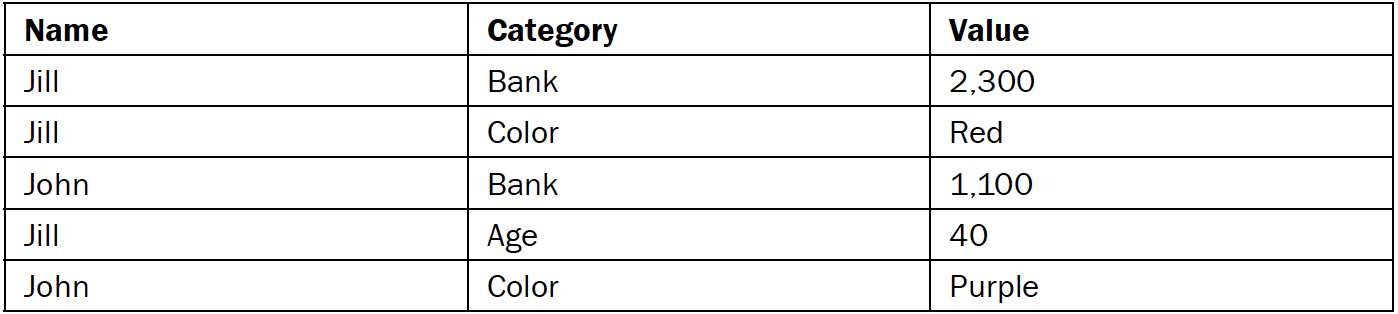

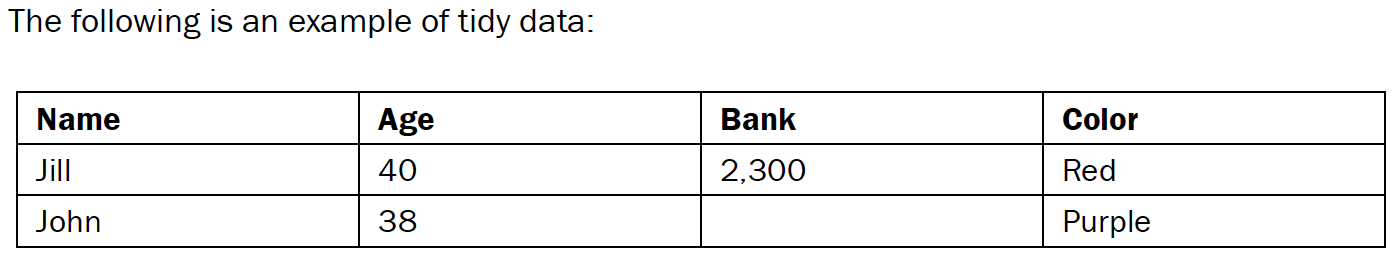

What is tidy data? Below are the some of guiding principles that determine whether a dataset
is tidy:
> Each variable forms a column

> Each observation forms a row

> Each type of observational unit forms a table

### The main tidy tools that pandas has available for you are the DataFrame methods .stack, .melt, .unstack, and .pivot

#### The most common types of messy data:

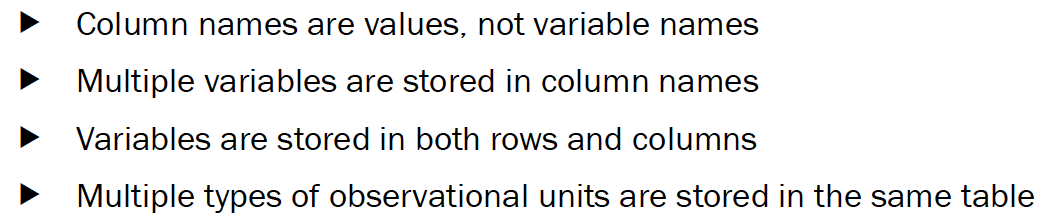

In [53]:
import pandas as pd
import numpy as np
state_fruit = pd.read_csv('state_fruit.csv')
state_fruit

,Unnamed: 0,Apple,Orange,Banana
0,Texas,12,10,40
1,Arizona,9,7,12
2,Florida,0,14,190


In [54]:
state_fruit = pd.read_csv('state_fruit.csv',index_col=0)

In [55]:
state_fruit

,Apple,Orange,Banana
Texas,12,10,40
Arizona,9,7,12
Florida,0,14,190


In [ ]:
#according to the tidy principles, it isn't tidy. Each column name is the value of a variable
#Variable names are on both row and columns


#state names are in the index of the DataFrame. These states 
#are correctly placed vertically and do not need to be restructured
#It is the column names that are the problem

In [56]:
#The .stack method takes all of the column names and pivots them into the index.
state_fruit.stack()

Texas    Apple      12
         Orange     10
         Banana     40
Arizona  Apple       9
         Orange      7
         Banana     12
Florida  Apple       0
         Orange     14
         Banana    190
dtype: int64

In [57]:
(state_fruit
 .stack()
 .reset_index()
 )

,level_0,level_1,0
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


In [58]:
(state_fruit
 .stack()
 .reset_index()
 .rename(columns={'level_0':'state','level_1': 'fruit', 0: 'weight'})
)

,state,fruit,weight
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


In [59]:
#Alternative to .rename method...rename_axis

(state_fruit
 .stack()
 .rename_axis(['state', 'fruit'])
)

state    fruit 
Texas    Apple      12
         Orange     10
         Banana     40
Arizona  Apple       9
         Orange      7
         Banana     12
Florida  Apple       0
         Orange     14
         Banana    190
dtype: int64

In [60]:
(state_fruit
 .stack()
 .rename_axis(['state', 'fruit'])
 .reset_index(name='weight')
)

,state,fruit,weight
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


#### Inverting stacked data

In [61]:
stack=state_fruit.stack()

In [62]:
stack

Texas    Apple      12
         Orange     10
         Banana     40
Arizona  Apple       9
         Orange      7
         Banana     12
Florida  Apple       0
         Orange     14
         Banana    190
dtype: int64

In [63]:
stack.unstack()

,Apple,Orange,Banana
Texas,12,10,40
Arizona,9,7,12
Florida,0,14,190


### Tidying variable values as column names with melt

In [64]:
#.melt is similar to .stack but comes with more flixibility
state_fruit2 = pd.read_csv('state_fruit2.csv')


In [65]:
state_fruit2

,State,Apple,Orange,Banana
0,Texas,12,10,40
1,Arizona,9,7,12
2,Florida,0,14,190


In [66]:
#columns to the id_vars and that you don't want to reshape
#value_vars parameters :list of column names that you want to reshape into a single column
state_fruit2.melt(id_vars=['State'],value_vars=['Apple', 'Orange', 'Banana'])

,State,variable,value
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


In [67]:
#Give appropriate column name
state_fruit2.melt(id_vars=['State'],
                  value_vars=['Apple', 'Orange', 'Banana'],
                  var_name='Fruit',
                  value_name='Weight')

,State,Fruit,Weight
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


In [69]:
state_fruit2

,State,Apple,Orange,Banana
0,Texas,12,10,40
1,Arizona,9,7,12
2,Florida,0,14,190


In [68]:
#All columns into a single column
state_fruit2.melt()

,variable,value
0,State,Texas
1,State,Arizona
2,State,Florida
3,Apple,12
4,Apple,9
5,Apple,0
6,Orange,10
7,Orange,7
8,Orange,14
9,Banana,40


#### Unstacking after a groupby aggregation

Grouping data by a single column and performing an aggregation on a single column returns
a result that is easy to consume. When grouping by more than one column, a resulting
aggregation might not be structured in a manner that makes consumption easy.

In [70]:
employee = pd.read_csv('employee.csv')

In [71]:
employee

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
...,...,...,...,...,...,...,...,...,...,...
1995,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09
1996,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06
1997,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13
1998,1998,POLICE OFFICER,Houston Police Department-HPD,55461.0,Asian/Pacific Islander,Full Time,Male,Active,2009-01-20,2011-07-02


In [72]:
(employee.groupby('RACE')['BASE_SALARY']
             .mean().astype(int) 
 )

RACE
American Indian or Alaskan Native    60272
Asian/Pacific Islander               61660
Black or African American            50137
Hispanic/Latino                      52345
Others                               51278
White                                64419
Name: BASE_SALARY, dtype: int64

In [73]:
#Let's now find the average salary for all races by gender. 
#the result is a Series:

(employee
.groupby(['RACE', 'GENDER'])['BASE_SALARY']
 .mean()
.astype(int)
 )

RACE                               GENDER
American Indian or Alaskan Native  Female    60238
                                   Male      60305
Asian/Pacific Islander             Female    63226
                                   Male      61033
Black or African American          Female    48915
                                   Male      51082
Hispanic/Latino                    Female    46503
                                   Male      54782
Others                             Female    63785
                                   Male      38771
White                              Female    66793
                                   Male      63940
Name: BASE_SALARY, dtype: int64

In [74]:
#unstack on the gender index level
(employee
.groupby(['RACE', 'GENDER'])['BASE_SALARY']
 .mean()
.astype(int)
 .unstack('GENDER')
 )

GENDER,Female,Male
RACE,,
American Indian or Alaskan Native,60238,60305
Asian/Pacific Islander,63226,61033
Black or African American,48915,51082
Hispanic/Latino,46503,54782
Others,63785,38771
White,66793,63940


In [75]:
#we can unstack the race index level:
(employee
.groupby(['RACE', 'GENDER'])['BASE_SALARY']
 .mean()
.astype(int)
.unstack('RACE')
 )

RACE,American Indian or Alaskan Native,Asian/Pacific Islander,Black or African American,Hispanic/Latino,Others,White
GENDER,,,,,,
Female,60238,63226,48915,46503,63785,66793
Male,60305,61033,51082,54782,38771,63940


#### Replicating pivot_table with a groupby aggregation

#### .pivot_table method provides a unique way to analyze data.

In [ ]:
#Using the .pivot_table method to find the
#totalnumber of canceled flights per origin airport for each airline

In [76]:
flights = pd.read_csv('flights.csv')

In [77]:
flights.columns

Index(['MONTH', 'DAY', 'WEEKDAY', 'AIRLINE', 'ORG_AIR', 'DEST_AIR',
       'SCHED_DEP', 'DEP_DELAY', 'AIR_TIME', 'DIST', 'SCHED_ARR', 'ARR_DELAY',
       'DIVERTED', 'CANCELLED'],
      dtype='object')

In [83]:
fpt = flights.pivot_table(index='AIRLINE',
columns='ORG_AIR',
values='CANCELLED',
aggfunc='sum',
fill_value=0)

In [84]:
fpt

ORG_AIR,ATL,DEN,DFW,IAH,LAS,LAX,MSP,ORD,PHX,SFO
AIRLINE,,,,,,,,,,
AA,3,4,86,3,3,11,3,35,4,2
AS,0,0,0,0,0,0,0,0,0,0
B6,0,0,0,0,0,0,0,0,0,1
DL,28,1,0,0,1,1,4,0,1,2
EV,18,6,27,36,0,0,6,53,0,0
F9,0,2,1,0,1,1,1,4,0,0
HA,0,0,0,0,0,0,0,0,0,0
MQ,5,0,62,0,0,0,0,85,0,0
NK,1,1,6,0,1,1,3,10,2,0


In [86]:
#Equivalent operation using .groupby method

#groupby two columns and then unstack them.

(flights
 .groupby(['AIRLINE', 'ORG_AIR']) ['CANCELLED']
 .sum()
)


AIRLINE  ORG_AIR
AA       ATL         3
         DEN         4
         DFW        86
         IAH         3
         LAS         3
                    ..
WN       LAS         7
         LAX        32
         MSP         1
         PHX         6
         SFO        25
Name: CANCELLED, Length: 114, dtype: int64

In [88]:
(flights
 .groupby(['AIRLINE', 'ORG_AIR']) ['CANCELLED']
 .sum()
).unstack('ORG_AIR',fill_value=0)

ORG_AIR,ATL,DEN,DFW,IAH,LAS,LAX,MSP,ORD,PHX,SFO
AIRLINE,,,,,,,,,,
AA,3,4,86,3,3,11,3,35,4,2
AS,0,0,0,0,0,0,0,0,0,0
B6,0,0,0,0,0,0,0,0,0,1
DL,28,1,0,0,1,1,4,0,1,2
EV,18,6,27,36,0,0,6,53,0,0
F9,0,2,1,0,1,1,1,4,0,0
HA,0,0,0,0,0,0,0,0,0,0
MQ,5,0,62,0,0,0,0,85,0,0
NK,1,1,6,0,1,1,3,10,2,0


####  Tidying when multiple variables are stored as column names

In [89]:
#An example of this scenario occurs when age and sex are concatenated together

weightlifting = pd.read_csv('weightlifting_men.csv')

In [90]:
weightlifting

,Weight Category,M35 35-39,M40 40-44,M45 45-49,M50 50-54,M55 55-59,M60 60-64,M65 65-69,M70 70-74,M75 75-79,M80 80+
0,56,137,130,125,115,102,92,80,67,62,55
1,62,152,145,137,127,112,102,90,75,67,57
2,69,167,160,150,140,125,112,97,82,75,60
3,77,182,172,165,150,135,122,107,90,82,65
4,85,192,182,175,160,142,130,112,95,87,70
5,94,202,192,182,167,150,137,120,100,90,75
6,105,210,200,190,175,157,142,122,102,95,80
7,105+,217,207,197,182,165,150,127,107,100,85


In [91]:
data= (weightlifting
 .melt(id_vars='Weight Category',
 var_name='sex_age',
 value_name='Qual Total')
 )

In [92]:
data

,Weight Category,sex_age,Qual Total
0,56,M35 35-39,137
1,62,M35 35-39,152
2,69,M35 35-39,167
3,77,M35 35-39,182
4,85,M35 35-39,192
...,...,...,...
75,77,M80 80+,65
76,85,M80 80+,70
77,94,M80 80+,75
78,105,M80 80+,80


In [93]:
##Now let us split column Sex_Age into different columns

data['sex_age'].str.split(expand=True)

,0,1
0,M35,35-39
1,M35,35-39
2,M35,35-39
3,M35,35-39
4,M35,35-39
...,...,...
75,M80,80+
76,M80,80+
77,M80,80+
78,M80,80+


In [94]:
data['sex_age'].str.split(expand=True).rename(columns={0:'Sex', 1:'Age Group'})

,Sex,Age Group
0,M35,35-39
1,M35,35-39
2,M35,35-39
3,M35,35-39
4,M35,35-39
...,...,...
75,M80,80+
76,M80,80+
77,M80,80+
78,M80,80+


In [95]:
#Create a Sex column using an index operation after the .str attribute to select the
#first character from the renamed Sex column

(data['sex_age']
 .str.split(expand=True)
 .rename(columns={0:'Sex', 1:'Age Group'})
 .assign(Sex=lambda df_: df_.Sex.str[0])
)


,Sex,Age Group
0,M,35-39
1,M,35-39
2,M,35-39
3,M,35-39
4,M,35-39
...,...,...
75,M,80+
76,M,80+
77,M,80+
78,M,80+


In [96]:
#Finally combine the all the columns

#Use the pd.concat function to concatenate this DataFrame with the Weight
#Category and Qual Total columns

melted = (weightlifting
 .melt(id_vars='Weight Category',
 var_name='sex_age',
    value_name='Qual Total')
 )

In [97]:
melted

,Weight Category,sex_age,Qual Total
0,56,M35 35-39,137
1,62,M35 35-39,152
2,69,M35 35-39,167
3,77,M35 35-39,182
4,85,M35 35-39,192
...,...,...,...
75,77,M80 80+,65
76,85,M80 80+,70
77,94,M80 80+,75
78,105,M80 80+,80


In [98]:
Final_Data = pd.concat([melted['sex_age']
.str.split(expand=True)
.rename(columns={0:'Sex', 1:'Age Group'})
.assign(Sex=lambda df_: df_.Sex.str[0]),
 melted[['Weight Category', 'Qual Total']]],
 axis='columns'
)

In [99]:
Final_Data

,Sex,Age Group,Weight Category,Qual Total
0,M,35-39,56,137
1,M,35-39,62,152
2,M,35-39,69,167
3,M,35-39,77,182
4,M,35-39,85,192
...,...,...,...,...
75,M,80+,77,65
76,M,80+,85,70
77,M,80+,94,75
78,M,80+,105,80


#### Tidying when two or more values are stored in the same cell

In [100]:
cities = pd.read_csv('texas_cities.csv')

In [101]:
cities

,City,Geolocation
0,Houston,"29.7604° N, 95.3698° W"
1,Dallas,"32.7767° N, 96.7970° W"
2,Austin,"30.2672° N, 97.7431° W"


In [102]:
geolocations = cities.Geolocation.str.split(expand=True)

In [103]:
geolocations

,0,1,2,3
0,29.7604°,"N,",95.3698°,W
1,32.7767°,"N,",96.7970°,W
2,30.2672°,"N,",97.7431°,W


In [104]:
geolocations.columns = ['latitude', 'latitude direction','longitude', 'longitude direction']

In [105]:
geolocations

,latitude,latitude direction,longitude,longitude direction
0,29.7604°,"N,",95.3698°,W
1,32.7767°,"N,",96.7970°,W
2,30.2672°,"N,",97.7431°,W


In [106]:
#Combine these new columns with the City column from the original

(geolocations.assign(city=cities['City']))

,latitude,latitude direction,longitude,longitude direction,city
0,29.7604°,"N,",95.3698°,W,Houston
1,32.7767°,"N,",96.7970°,W,Dallas
2,30.2672°,"N,",97.7431°,W,Austin
